In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_demo=pd.read_csv('Building_Permits.csv')
raw_demo.count()

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,16,18,44,45,46,47,48,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID                        18722
PERMIT#                   18722
PERMIT_TYPE               18722
REVIEW_TYPE               18722
APPLICATION_START_DATE    18722
ISSUE_DATE                18722
PROCESSING_TIME           18722
STREET_NUMBER             18722
STREET DIRECTION          18722
STREET_NAME               18722
SUFFIX                    18626
WORK_DESCRIPTION          18722
BUILDING_FEE_PAID         18722
ZONING_FEE_PAID           18722
OTHER_FEE_PAID            18722
SUBTOTAL_PAID             18722
BUILDING_FEE_UNPAID       18722
ZONING_FEE_UNPAID         18722
OTHER_FEE_UNPAID          18722
SUBTOTAL_UNPAID           18722
BUILDING_FEE_WAIVED       18722
ZONING_FEE_WAIVED         18722
OTHER_FEE_WAIVED          18722
SUBTOTAL_WAIVED           18722
TOTAL_FEE                 18722
CONTACT_1_TYPE            18722
CONTACT_1_NAME            18722
CONTACT_1_CITY            18690
CONTACT_1_STATE           18689
CONTACT_1_ZIPCODE         17924
                          ...  
CONTACT_

In [3]:
demo=raw_demo[["ISSUE_DATE","WORK_DESCRIPTION","TOTAL_FEE","COMMUNITY_AREA","CENSUS_TRACT","LATITUDE","LONGITUDE"]]
demo.head()

,ISSUE_DATE,WORK_DESCRIPTION,TOTAL_FEE,COMMUNITY_AREA,CENSUS_TRACT,LATITUDE,LONGITUDE
0,11/3/2021,ADMINISTRATIVE ORDER TO WRECK AND REMOVE A 1 S...,2000,46.0,833900.0,41.730566,-87.551122
1,3/23/2021,WRECK AND REMOVE A 2 STORY FRAME RESIDENCE AND...,500,4.0,40402.0,41.974943,-87.676226
2,11/3/2021,WRECK AND REMOVE A 1 STORY MASONRY RESIDENCE A...,500,9.0,90200.0,42.007932,-87.808459
3,11/3/2021,EMERGENCY WRECK AND REMOVE A 3 STORY MASONRY M...,500,68.0,681000.0,41.776807,-87.649715
4,10/6/2020,EMERGENCY WRECK AND REMOVE A 1 STORY FRAME RES...,500,66.0,660700.0,NaN,NaN


In [4]:
df=demo
df.dropna
df["TOTAL_FEE"].value_counts()

300      8516
500      6042
110      1789
133       694
156       169
125       126
179        95
202        56
225        32
1500       29
248        26
2250       26
131        25
271        24
502        20
342        20
108        18
363        18
317        18
85         16
525        16
220        14
600        14
386        13
1000       13
294        12
340        11
334        11
2000       10
456        10
         ... 
7373        1
1518        1
1160        1
7220        1
472         1
1479        1
1511        1
1559        1
4186        1
1950        1
264         1
344         1
1934        1
408         1
6555        1
3919        1
504         1
1144        1
536         1
10829       1
1790        1
664         1
2745        1
1710        1
808         1
2953        1
984         1
1534        1
1064        1
4078        1
Name: TOTAL_FEE, Length: 566, dtype: int64

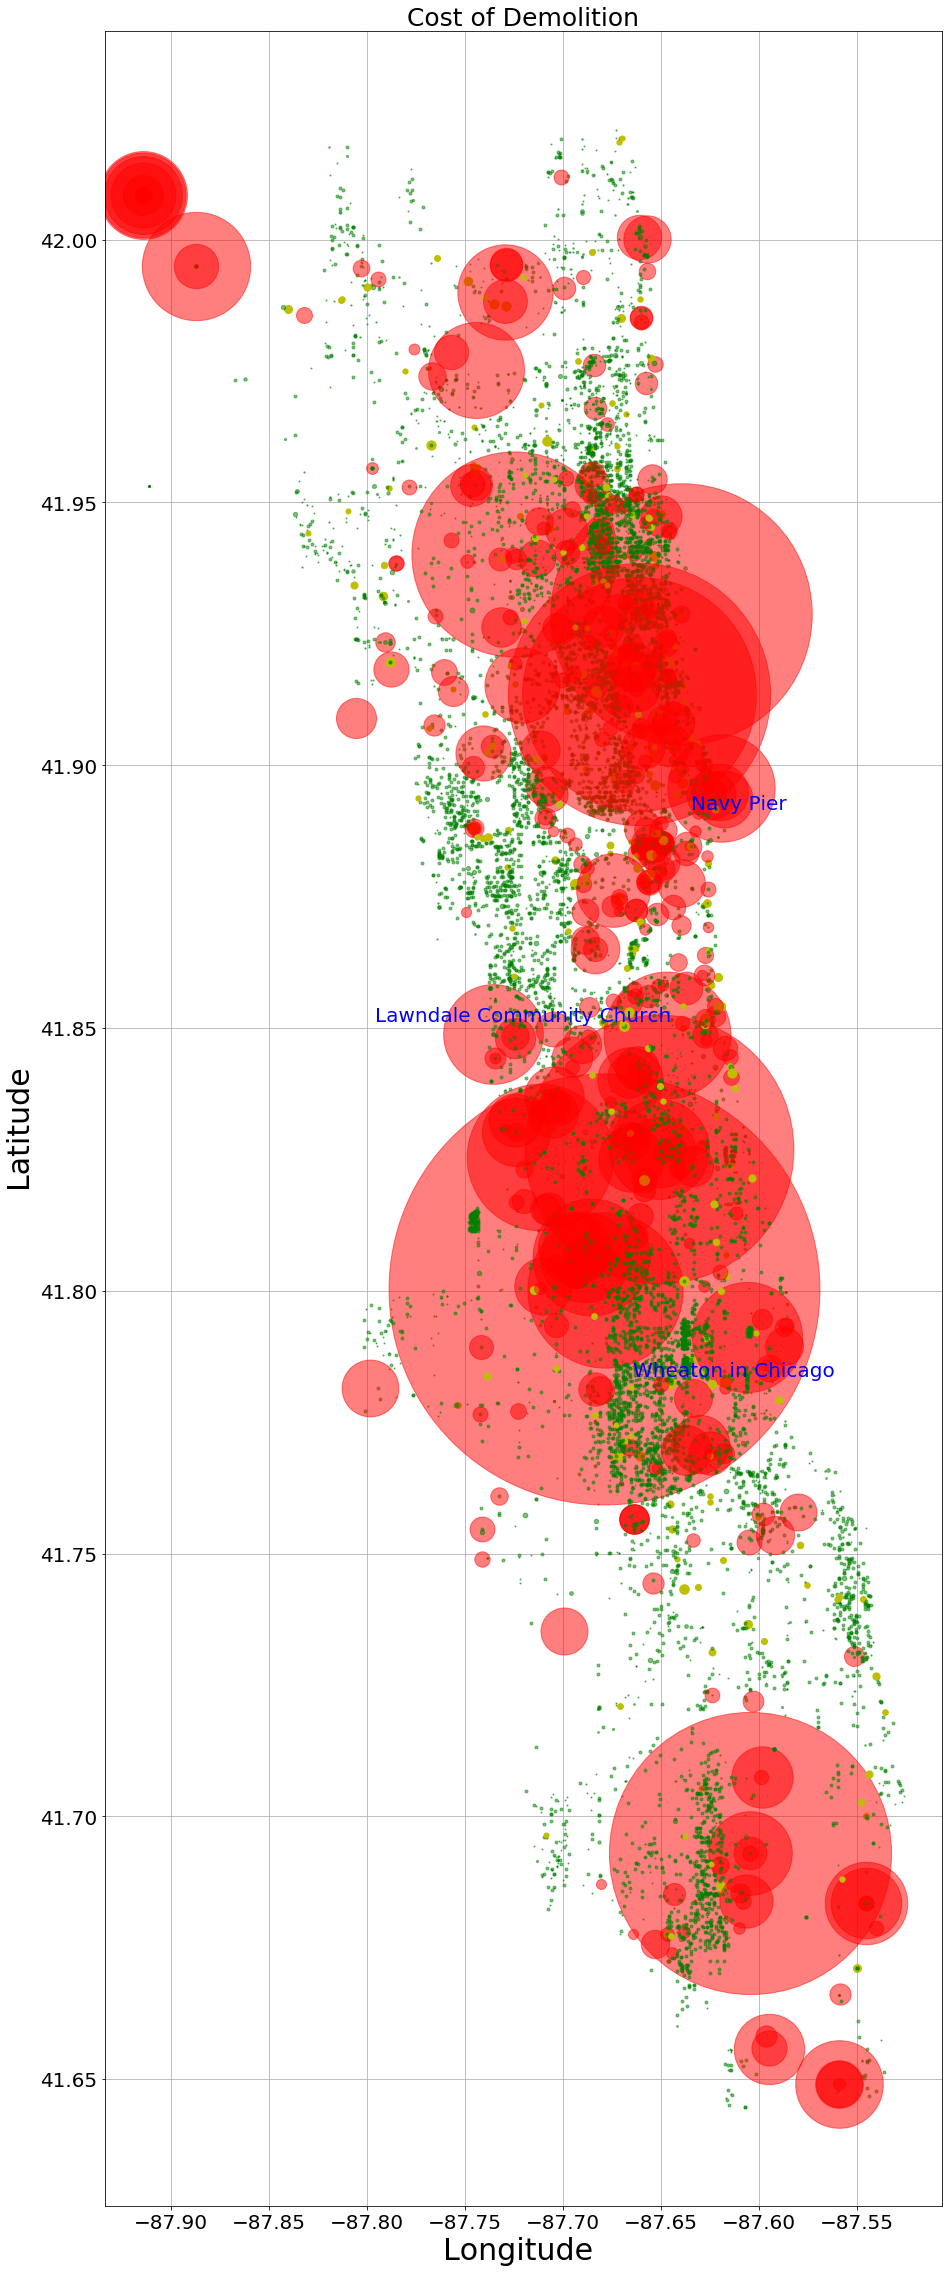

In [6]:
plt.figure(figsize=(15,40))

for i in df.index:
    tf=float(df.loc[i,"TOTAL_FEE"])
    if tf<500: #plot in green
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='g', markeredgecolor='g', markersize=.01*tf,alpha=.5)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
    if tf>500 and tf <1000:  #plot in yellow
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='y', markeredgecolor='y',  markersize=.01*tf,alpha=1)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
    if tf >1000:  #plot in red
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='r', markeredgecolor='r',  markersize=.01*tf,alpha=.5)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#Add Geographic References
plt.text(-87.610168,41.892654,'Navy Pier',color='b',size='20',ha='center',va='center')
plt.text( -87.61278695965538,41.78473872071868,'Wheaton in Chicago',color='b',size='20',ha='center',va='center')
plt.text( -87.71996132355223,41.85229188536204,'Lawndale Community Church',color='b',size='20',ha='center',va='center')
#title
plt.title('Cost of Demolition',size=25)  #add the title
plt.xlabel("Longitude ",size=30)  #add the x-axis label
plt.ylabel("Latitude  ",size=30)  #dd the y-axis label
plt.savefig("demolition.png") #save the figure to a file